In [4]:
import pandas as pd

In [18]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Define column names based on dataset description
column_names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
                'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 
                'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 
                'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 
                'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 
                'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 
                'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Load dataset into a DataFrame
data = pd.read_csv(url, names=column_names)

# Display first few rows of the dataset
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [19]:
# Splitting the data into features (X) and target (y)
X = data.drop(['id', 'diagnosis'], axis=1)  # Features
y = data['diagnosis']  # Target

# Encode the target variable (Malignant: M, Benign: B)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Initializing the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Training the Decision Tree model
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best Decision Tree model
best_dt_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Model Accuracy:", accuracy)

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# View the best parameters found by GridSearchCV
print("\nBest Parameters:", grid_search.best_params_)

Decision Tree Model Accuracy: 0.9473684210526315

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114


Confusion Matrix:
[[70  1]
 [ 5 38]]

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [22]:
from sklearn.feature_selection import SelectKBest, f_classif

# Perform feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train a Decision Tree classifier on the selected features
dt_classifier_selected = DecisionTreeClassifier(random_state=42)
dt_classifier_selected.fit(X_train_selected, y_train)

# Evaluate the model on the test set with selected features
y_pred_selected = dt_classifier_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Decision Tree Model Accuracy with Selected Features:", accuracy_selected)


Decision Tree Model Accuracy with Selected Features: 0.9298245614035088


In [23]:
# Option to specify class weights for handling class imbalance
dt_classifier_balanced = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_classifier_balanced.fit(X_train, y_train)

# Evaluate the balanced model on the test set
y_pred_balanced = dt_classifier_balanced.predict(X_test)
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
print("Decision Tree Model Accuracy with Class Balancing:", accuracy_balanced)



Decision Tree Model Accuracy with Class Balancing: 0.956140350877193


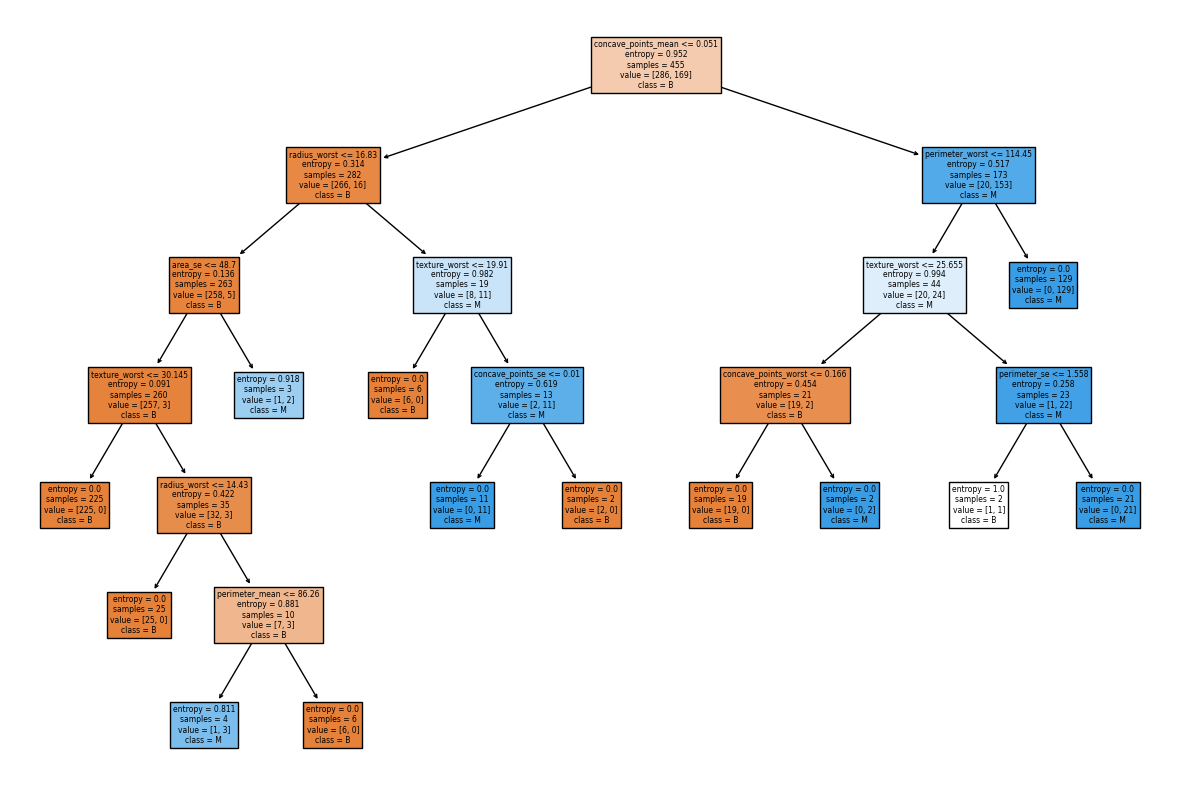

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the trained Decision Tree classifier
plt.figure(figsize=(15, 10))
plot_tree(best_dt_model, filled=True, feature_names=X.columns, class_names=le.classes_)
plt.show()

In [25]:
# Display the predicted values for the test set
print("\nPredicted Values:")
predictions_df = pd.DataFrame({'Actual': le.inverse_transform(y_test), 'Predicted': le.inverse_transform(y_pred)})
print(predictions_df.head())


Predicted Values:
  Actual Predicted
0      B         B
1      M         M
2      M         M
3      B         B
4      B         B
